In [1]:
import h5py
import numpy as np
import pandas as pd 
from cesium import featurize
import matplotlib.pyplot as plt
import seaborn as sns 
plt.rcParams["figure.figsize"] = [16,9]
sns.set_style('whitegrid')

GRID_SIZE = 0.06
LOWER_LAMBDA = 6472.5
UPPER_LAMBDA = 6740
PLOT_MASK = range(1475,1550)

In [2]:
hf_spec = h5py.File("/home/pravn/Dropbox/Masters/Research Data/resampled_emission_spectra.h5", "r")
hf_grid = h5py.File("/home/pravn/Dropbox/Masters/Research Data/wl_grid.h5", "r")

wl_grid = np.array(hf_grid["wl_grid"])
df = pd.DataFrame(hf_spec["spectra"])

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4449,4450,4451,4452,4453,4454,4455,4456,4457,4458
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [4]:
hf_spec.close()
hf_grid.close()

In [5]:
df_masked = df.loc[:,PLOT_MASK]
df_masked_np = df_masked.to_numpy()

In [6]:
features_to_use = ["amplitude","maximum","minimum","all_times_nhist_numpeaks"] #see cessium-ml.org/docs for more features and descriptors

In [7]:
wl_grid_array = np.tile(wl_grid[PLOT_MASK], (df_masked_np.shape[0],1)) #for compatability reasons, we need to create an (p,n) grid of "times" for (p,n) sames where n = number of timestamps 

In [8]:
wl_grid_array.shape

(6977, 75)

In [9]:
df_masked_np.shape

(6977, 75)

In [10]:
wl_grid_list = list(wl_grid_array) #cesium takes inputs as a list of (p,n) time series so we convert to a list 

In [12]:
df_masked_list = list(df_masked_np)

In [13]:
fset_cesium = featurize.featurize_time_series(times=wl_grid_list ,values=df_masked_list, errors=None,features_to_use=features_to_use) #feature computation step

In [14]:
print(fset_cesium.head())

feature amplitude   maximum   minimum all_times_nhist_numpeaks
channel         0         0         0                        0
0        0.255384  0.842837  0.332068                     24.0
1        0.161495  1.187498  0.864509                     24.0
2        0.318583  1.585654  0.948488                     24.0
3        0.173698  0.988212  0.640817                     24.0
4        0.133566  0.961354  0.694222                     24.0


In [18]:
fset_cesium["maximum"].value_counts()

0.635420     1
1.038737     1
1.040301     1
1.040205     1
1.039957     1
            ..
0.899914     1
0.899884     1
0.899879     1
0.899862     1
18.724234    1
Length: 6977, dtype: int64

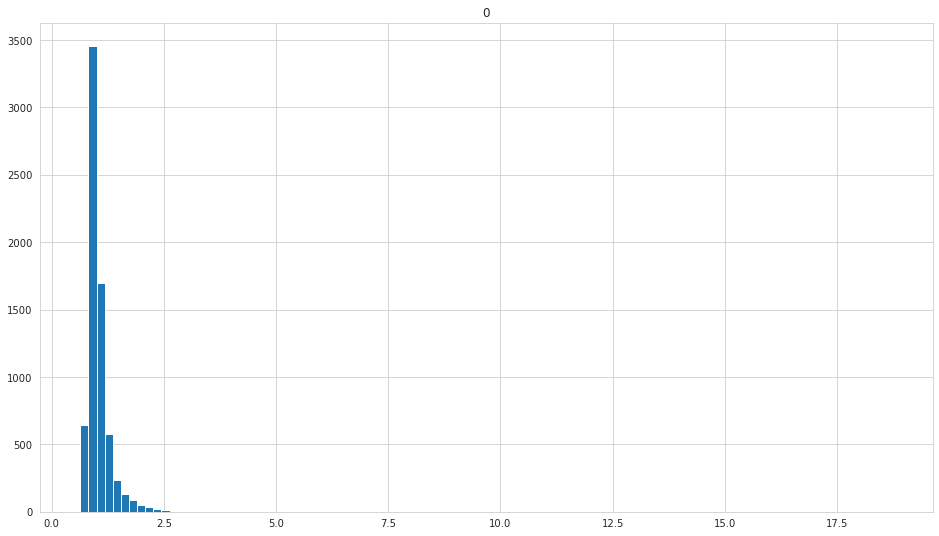

In [22]:
hist_maximum = fset_cesium["maximum"].hist(bins=100)

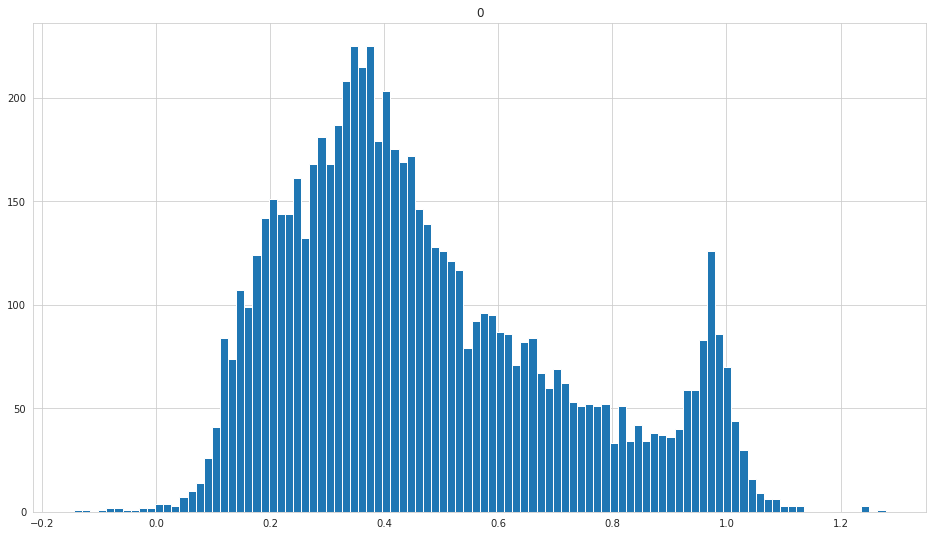

In [23]:
hist_maximum = fset_cesium["minimum"].hist(bins=100)

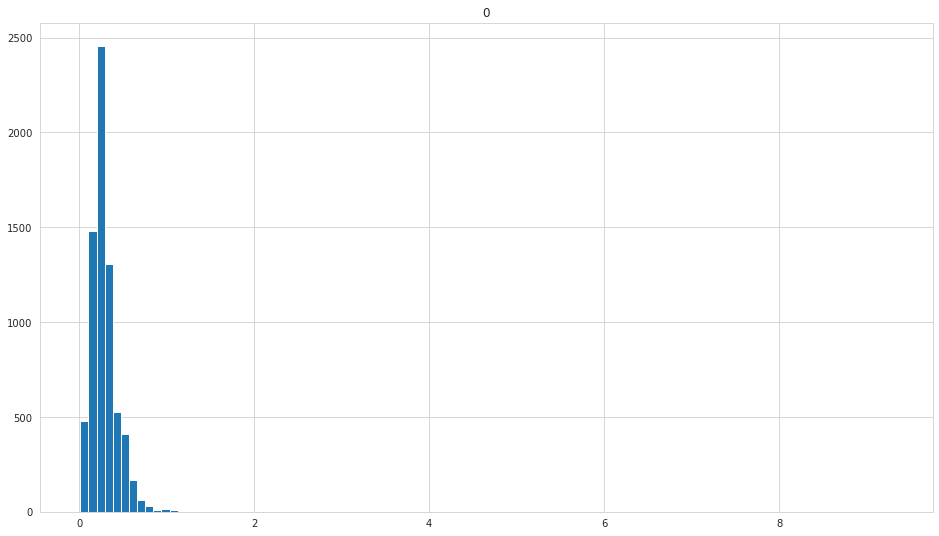

In [24]:
hist_maximum = fset_cesium["amplitude"].hist(bins=100)